#### EJERCICIO 1

##### Análisis descriptivo de los datos británicos de ingresos familiares en 1974 (reescalados dividiendo por la media) contenidos en el fichero Datos-ingresos.txt. En concreto,  se calcula los estadísticos de posición o tendencia central, las medidas de dispersión, se representa un diagrama de cajas y un estimador del núcleo de la función de densidad.

Se importan los paquetes necesarios:

In [7]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import plotnine
from plotnine import *

Se importan los datos:

In [8]:
# primero vamos a convertir el txt en un csv

with open("C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\datos-ingresos.txt","r") as file: 
    lines = file.readlines()
    datos = []
    for line in lines:
        line =float(line.strip())
        datos.append(line)

with open("C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\Datos-ingresos.csv","w",newline='') as f:
    writer = csv.writer(f)
    for fila in datos:
        writer.writerow([fila])

In [9]:
data = pd.read_csv("C:\\Users\\Usuario\\Desktop\\STAT\\Hoja 1\\Data\\datos-ingresos.csv", header=None)
df = pd.DataFrame({'x': datos})

Se calculan los distintos estadísticos básicos: 

In [10]:
data.describe()

,0
count,6711.000000
mean,1.022779
std,0.604813
min,0.012000
25%,0.570400
50%,0.941700
75%,1.332450
max,9.122500


Diagrama de cajas:

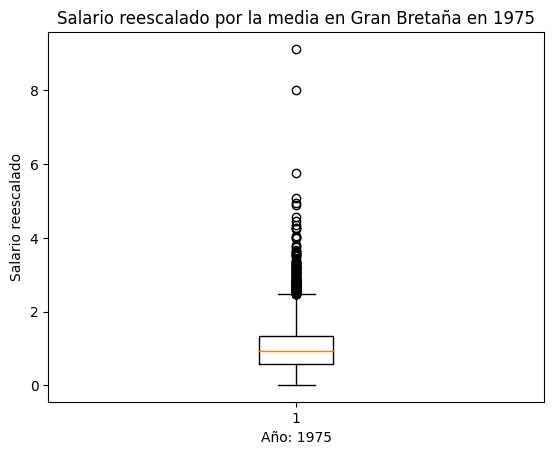

In [11]:
fig, ax =plt.subplots() # se crean la figura y los ejes
ax.boxplot(data) # se dibuja el diagrama de cajas
ax.set_title('Salario reescalado por la media en Gran Bretaña en 1975')
ax.set_xlabel('Año: 1975')
ax.set_ylabel('Salario reescalado')
plt.show()

Cálculo del estimador del núcleo de la función de densidad: 

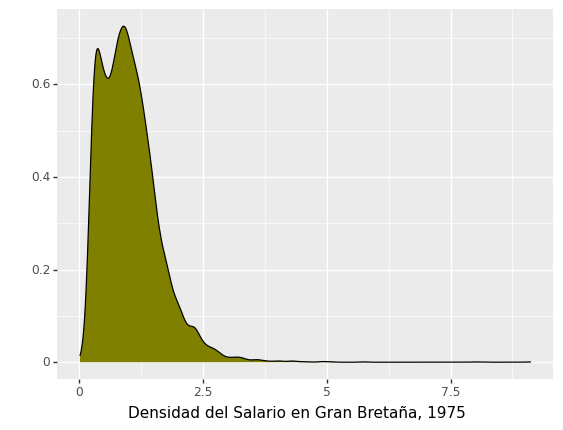

<ggplot: (138561046353)>

In [12]:
(ggplot(df, aes(x ='x')) + geom_density(fill='olive')+labs(x = "Densidad del Salario en Gran Bretaña, 1975", y=" "))

Cálculo alternativo para obtener el estimador del núcleo de la función de densidad:

In [13]:
def gaussiana(x):
    '''Se define una función de núcleo simétrico, por ejemplo la Gaussiana'''
    return np.exp(-x**2 / 2)/np.sqrt(2*np.pi)

In [14]:
def estimador_nucleo(datos,x,h):
    '''Cálculo de la función de densidad para cada punto del dominio, ponderando los datos más cercanos al punto 
    utilizando un parámetro de ancho de banda h'''
    estimacion = 0
    for dato in datos:
        estimacion += gaussiana((x-dato)/h)
    estimacion /=len(datos)*h
    return estimacion

In [41]:
# se aplica la función estimador_nucleo para cada punto del dominio para obtener la estimación de la función de 
# densidad para todo el conjunto de datos. 

dominio = np.linspace(data.iloc[:,0].min(),data.iloc[:,0].max(),100)

h = 0.02
estimacion = [estimador_nucleo(data.iloc[:,0],x, h) for x in dominio]

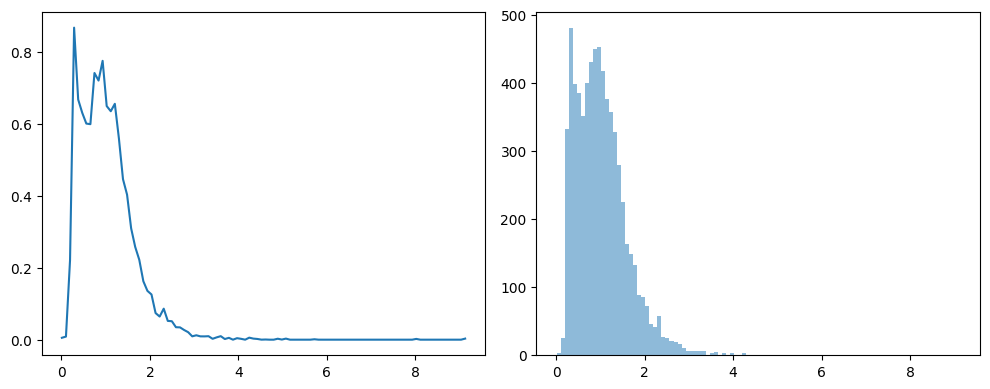

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(dominio, estimacion)

ax2.hist(data.iloc[:, 0], alpha=0.5, bins=100)


fig.tight_layout()
plt.show()